In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
df=pd.read_csv("AAPL.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


<AxesSubplot: xlabel='Date'>

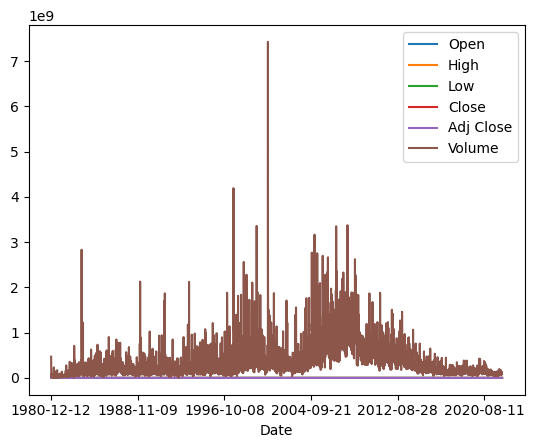

In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
df.set_index('Date',inplace=True)
# df.index=pd.to_datetime(df.index)#drop null values
df.dropna (inplace=True)
df.plot()

In [ ]:
result=seasonal_decompose(df['Volume'], model='additive', period=12)
result.seasonal.plot()
result.trend.plot()
result.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import plotly.express as px
df.Date=pd.to_datetime(df.Date)
print(df)

In [ ]:
series = df.loc[:, 'Volume'].values
print(series)

In [ ]:
fig = px.line(df, x='Date', y="Volume")
fig.show()

In [ ]:
result = adfuller(series, autolag='AIC')
print (f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print (f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print (f' {key}, {value}')

In [ ]:
from statsmodels.tsa.stattools import kpss
df.Date=pd.to_datetime(df.Date)
print(df)

In [ ]:
series = df.loc[:, 'Volume'].values
print(series)

In [ ]:
fig = px.line(df, x='Date', y="Volume")
fig.show()

In [ ]:
kpsstest = kpss (series, regression='c')
kpss_output = pd.Series (kpsstest[0:3], index=['Test Statistic', 'p-value', 'Lags Used'])
#printing critical values at 1%, 2.5%, 5% and 10%
for key,value in kpsstest[3].items():
    kpss_output['critical Value (%s)'%key] = value
print(kpss_output)